In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4

In [98]:
!pip install cartopy
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

import xarray as xr

In [122]:
ds = xr.open_dataset('/gpu_deep/ROMS/ocean_avg_0079.nc', chunks={'ocean_time': 1})
ds = ds.set_coords(['Cs_r', 'Cs_w', 'hc', 'h', 'Vtransform'])

In [123]:
if ds.Vtransform == 1:
    Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
    z_rho = Zo_rho + ds.zeta * (1 + Zo_rho/ds.h)
elif ds.Vtransform == 2:
    Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
    z_rho = ds.zeta + (ds.zeta + ds.h) * Zo_rho

ds.coords['z_rho'] = z_rho.transpose()   # needing transpose seems to be an xarray bug

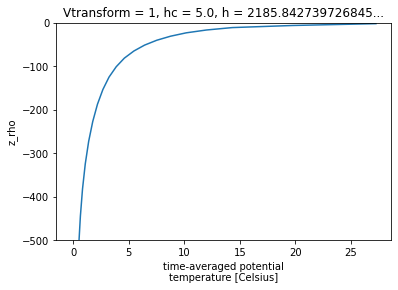

In [124]:
temp_sect=ds.temp.isel(xi_rho=143, eta_rho=222,ocean_time=0)
ssh_sect=ds.zeta.isel(xi_rho=143, eta_rho=222,ocean_time=0)
temp_sect.plot(y='z_rho')

plt.ylim([-500,0]);
#temp_sect.dims
depth_temp=temp_sect.coords["z_rho"].values
depth_temp_value=temp_sect.values
roms_ssh=ssh_sect.values

In [125]:
ssh_sect
lon=ssh_sect.coords["lon_rho"].values
lat=ssh_sect.coords["lat_rho"].values
lon,lat

(array(130.88888889), array(36.9795371))

In [126]:
lon=temp_sect.coords["lon_rho"].values
lat=temp_sect.coords["lat_rho"].values
lon,lat

(array(130.88888889), array(36.9795371))

In [127]:
depth_temp
import pandas as pd
hycom_ocean_ssh_df = pd.DataFrame(columns=['DATE','SSH'])
hycom_ocean_ssh_df["DATE"]=ssh_sect.ocean_time.values
hycom_ocean_ssh_df["SSH"]=ssh_sect.values
# Create the dataframe
depth_df = pd.DataFrame(depth_temp)
depth_temp_df=pd.DataFrame(depth_temp_value)


In [128]:
ssh_sect.ocean_time.values
ssh_sect.values

array(-0.09594635)

In [129]:
hycom_ocean_ssh_df

,DATE,SSH


In [130]:
depth_df.columns=["Depth"]
depth_temp_df.columns=["Temp"]

In [131]:
depth_list=[0,10,20,30,50,75,100,125,150,200,250,300,400,500]

In [132]:
import numpy as np
index = []
for depth in depth_list:
    temp=np.absolute(-depth_temp-depth).argmin()
    index.append(temp)

index

[39, 37, 35, 34, 32, 30, 29, 28, 27, 26, 24, 23, 22, 20]

In [133]:
result=pd.concat([depth_df,depth_temp_df],axis=1)
result

,Depth,Temp
0,-2105.716023,-0.160852
1,-1959.260080,-0.139333
2,-1829.251602,-0.106329
3,-1713.555053,-0.078435
4,-1610.233818,-0.050827
5,-1517.515471,-0.026281
6,-1433.759878,-0.006254
7,-1357.430520,0.011104
8,-1287.070011,0.026512
9,-1221.281652,0.040748


In [134]:
ROMS_TEMP=pd.DataFrame(result,index=[39,37, 35, 34, 32, 30, 29, 28, 27, 26, 24, 23, 22, 20])

In [135]:
ROMS_TEMP=ROMS_TEMP['Temp']
ROMS_TEMP.reset_index(drop=True, inplace=True)
list_temp=ROMS_TEMP.values.tolist()
roms_df=pd.DataFrame([list_temp],columns=['0','10','20','30','50','75','100','125','150','200','250','300','400','500'])
roms_df

,0,10,20,30,50,75,100,125,150,200,250,300,400,500
0,27.275173,14.327539,10.172876,8.760952,6.421658,4.597632,3.863861,3.214664,2.661034,2.172941,1.379992,1.07319,0.825321,0.487221


In [138]:
from datetime import datetime
import pandas as pd
roms_df_FEB=pd.DataFrame(columns=['0','10','20','30','50','75','100','125','150','200','250','300','400','500','DATE','SSH'])
#for roms_id in ['0018','0141','0261','0384','0505','0626','0748','0870','0991','1112']:
for roms_id in range (1993,2018):
    ds = xr.open_dataset('/gpu_deep/Deep_Ocean/ROMS_RE/test06_monthly_'+str(roms_id)+'_02.nc', chunks={'ocean_time': 1})
    ds = ds.set_coords(['Cs_r', 'Cs_w', 'hc', 'h', 'Vtransform'])

    if ds.Vtransform == 1:
        Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
        z_rho = Zo_rho + ds.zeta * (1 + Zo_rho/ds.h)
    elif ds.Vtransform == 2:
        Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
        z_rho = ds.zeta + (ds.zeta + ds.h) * Zo_rho

    ds.coords['z_rho'] = z_rho.transpose()   # needing transpose seems to be an xarray bug

    temp_sect=ds.temp.isel(xi_rho=143, eta_rho=222,ocean_time=0)
    ssh_sect=ds.zeta.isel(xi_rho=143, eta_rho=222,ocean_time=0)

    depth_temp=temp_sect.coords["z_rho"].values
    depth_temp_value=temp_sect.values
    depth_df = pd.DataFrame(depth_temp)
    depth_temp_df=pd.DataFrame(depth_temp_value)

    depth_df.columns=["Depth"]
    depth_temp_df.columns=["Temp"]

    result=pd.concat([depth_df,depth_temp_df],axis=1)
    result


    depth_list=[0,10,20,30,50,75,100,125,150,200,250,300,400,500]

    import numpy as np
    index = []
    for depth in depth_list:
        temp=np.absolute(-depth_temp-depth).argmin()
        index.append(temp)


    ROMS_TEMP=pd.DataFrame(result,index=[39,37, 35, 34, 32, 30, 29, 28, 27, 26, 24, 23, 22, 20])
    ROMS_TEMP=ROMS_TEMP['Temp']
    ROMS_TEMP.reset_index(drop=True, inplace=True)
    list_temp=ROMS_TEMP.values.tolist()
    roms_df=pd.DataFrame([list_temp],columns=['0','10','20','30','50','75','100','125','150','200','250','300','400','500'])
    roms_df
    date_time_obj=datetime.strptime(str(ssh_sect.ocean_time.values)[:10],'%Y-%m-%d')
    str_date=str(date_time_obj)[:10]
    print(str_date)
    date_list=[]
    date_list=str_date
    ssh_list=[]
    ssh_list=ssh_sect.values.tolist()
    date_df=pd.DataFrame([date_list],columns=['DATE'])
    ssh_df=pd.DataFrame([ssh_list],columns=['SSH'])
    roms_df=pd.concat([roms_df,date_df,ssh_df],axis=1)
    roms_df_FEB=pd.concat([roms_df_FEB,roms_df])
roms_df_FEB.reset_index(drop=True, inplace=True)

1993-02-15
1994-02-15
1995-02-15
1996-02-15
1997-02-15
1998-02-15
1999-02-15
2000-02-15
2001-02-15
2002-02-15
2003-02-15
2004-02-15
2005-02-15
2006-02-15
2007-02-15
2008-02-15
2009-02-15
2010-02-15
2011-02-15
2012-02-15
2013-02-15
2014-02-15
2015-02-15
2016-02-15
2017-02-15


In [139]:
roms_df_FEB
roms_df_FEB.to_csv('/gpu_deep/Deep_Ocean/roms_df_FEB.csv')

In [140]:
roms_df_FEB

,0,10,20,30,50,75,100,125,150,200,250,300,400,500,DATE,SSH
0,12.599119,12.602390,12.598502,12.594394,12.584883,12.581438,12.582594,12.584333,12.585774,12.586744,12.587135,12.586402,12.585069,12.583349,1993-02-15,0.079606
1,12.744581,12.740081,12.737072,12.734669,12.728035,12.718578,12.709496,12.693525,12.674464,12.654636,12.608937,12.586908,12.565399,12.522007,1994-02-15,0.076561
2,13.046324,13.044522,13.038156,13.032492,13.014406,12.986818,12.972540,12.958997,12.945834,12.933026,12.909432,12.899240,12.890959,12.882114,1995-02-15,0.123713
3,11.724565,11.728454,11.727581,11.726366,11.719730,11.706814,11.702261,11.699583,11.698037,11.697223,11.697884,11.697746,11.697406,11.697431,1996-02-15,0.079148
4,12.959604,12.953384,12.941995,12.932165,12.908943,12.884655,12.871428,12.858992,12.847261,12.836050,12.817316,12.809052,12.800947,12.786429,1997-02-15,0.073776
5,13.703224,13.704025,13.693933,13.684194,13.644588,13.594293,13.565704,13.531801,13.484877,13.429570,13.330080,13.281829,13.230909,13.120326,1998-02-15,0.112035
6,13.647864,13.651544,13.649663,13.647480,13.641136,13.632200,13.626916,13.621162,13.614584,13.606685,13.585332,13.572672,13.561185,13.544469,1999-02-15,0.069513
7,12.715581,12.722023,12.722567,12.722091,12.720125,12.715538,12.711827,12.707206,12.701992,12.697344,12.690056,12.686293,12.683737,12.684693,2000-02-15,0.148206
8,13.387715,13.379390,13.363924,13.349852,13.309982,13.270129,13.249998,13.228593,13.209126,13.191112,13.157903,13.142842,13.129439,13.107006,2001-02-15,0.111023
9,13.090790,13.086984,13.081510,13.075819,13.057513,13.039288,13.029673,13.020392,13.012649,13.006583,12.999516,12.997320,12.996950,13.003953,2002-02-15,0.123032


In [141]:
from datetime import datetime
import pandas as pd
roms_df_AUG=pd.DataFrame(columns=['0','10','20','30','50','75','100','125','150','200','250','300','400','500','DATE','SSH'])
#for roms_id in ['0079','0201','0321','0444','0565','0686','0808','0930','1051','1172']:
for roms_id in range (1993,2018):
    ds = xr.open_dataset('/gpu_deep/Deep_Ocean/ROMS_RE/test06_monthly_'+str(roms_id)+'_08.nc', chunks={'ocean_time': 1})
    ds = ds.set_coords(['Cs_r', 'Cs_w', 'hc', 'h', 'Vtransform'])

    if ds.Vtransform == 1:
        Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
        z_rho = Zo_rho + ds.zeta * (1 + Zo_rho/ds.h)
    elif ds.Vtransform == 2:
        Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
        z_rho = ds.zeta + (ds.zeta + ds.h) * Zo_rho

    ds.coords['z_rho'] = z_rho.transpose()   # needing transpose seems to be an xarray bug

    temp_sect=ds.temp.isel(xi_rho=143, eta_rho=222,ocean_time=0)
    ssh_sect=ds.zeta.isel(xi_rho=143, eta_rho=222,ocean_time=0)

    depth_temp=temp_sect.coords["z_rho"].values
    depth_temp_value=temp_sect.values
    depth_df = pd.DataFrame(depth_temp)
    depth_temp_df=pd.DataFrame(depth_temp_value)

    depth_df.columns=["Depth"]
    depth_temp_df.columns=["Temp"]

    result=pd.concat([depth_df,depth_temp_df],axis=1)
    result


    depth_list=[0,10,20,30,50,75,100,125,150,200,250,300,400,500]

    import numpy as np
    index = []
    for depth in depth_list:
        temp=np.absolute(-depth_temp-depth).argmin()
        index.append(temp)


    ROMS_TEMP=pd.DataFrame(result,index=[39,37, 35, 34, 32, 30, 29, 28, 27, 26, 24, 23, 22, 20])
    ROMS_TEMP=ROMS_TEMP['Temp']
    ROMS_TEMP.reset_index(drop=True, inplace=True)
    list_temp=[]
    list_temp=ROMS_TEMP.values.tolist()
    roms_df=pd.DataFrame([list_temp],columns=['0','10','20','30','50','75','100','125','150','200','250','300','400','500'])
    roms_df
    date_time_obj=datetime.strptime(str(ssh_sect.ocean_time.values)[:10],'%Y-%m-%d')
    str_date=str(date_time_obj)[:10]
    print(str_date)
    date_list=[]
    date_list=str_date
    ssh_list=[]
    ssh_list=ssh_sect.values.tolist()
    date_df=pd.DataFrame([date_list],columns=['DATE'])
    ssh_df=pd.DataFrame([ssh_list],columns=['SSH'])
    roms_df=pd.concat([roms_df,date_df,ssh_df],axis=1)
    roms_df_AUG=pd.concat([roms_df_AUG,roms_df])
roms_df_AUG.reset_index(drop=True, inplace=True)

1993-08-16
1994-08-16
1995-08-16
1996-08-16
1997-08-16
1998-08-16
1999-08-16
2000-08-16
2001-08-16
2002-08-16
2003-08-16
2004-08-16
2005-08-16
2006-08-16
2007-08-16
2008-08-16
2009-08-16
2010-08-16
2011-08-16
2012-08-16
2013-08-16
2014-08-16
2015-08-16
2016-08-16
2017-08-16


In [142]:
roms_df_AUG
roms_df_AUG.to_csv('/gpu_deep/Deep_Ocean/roms_df_AUG.csv')

In [143]:
roms_df_AUG

,0,10,20,30,50,75,100,125,150,200,250,300,400,500,DATE,SSH
0,24.988302,24.806519,23.339127,22.149080,20.211048,18.892653,18.393858,17.964066,17.587294,17.248522,16.647905,16.373901,16.112391,15.616447,1993-08-16,0.186597
1,28.340473,28.039574,27.131069,26.365812,24.675343,22.655085,21.712067,20.853901,20.085512,19.399450,18.238310,17.744213,17.297047,16.519300,1994-08-16,0.242935
2,26.713139,25.964838,23.297266,22.017021,20.106812,18.896885,18.435032,18.038397,17.691597,17.384958,16.858738,16.628963,16.415985,16.028339,1995-08-16,0.181455
3,28.683996,28.248034,26.393557,25.042805,22.471228,20.286160,19.403299,18.663717,18.048595,17.534098,16.724764,16.397812,16.106884,15.601144,1996-08-16,0.230360
4,26.441713,26.217279,25.480291,24.813684,23.258970,21.583786,20.868273,20.256323,19.735624,19.283976,18.521393,18.186947,17.873884,17.297127,1997-08-16,0.225539
5,26.879555,26.419559,24.663996,23.720219,22.252394,21.136600,20.659470,20.222084,19.812660,19.428316,18.720564,18.393343,18.081133,17.492361,1998-08-16,0.194514
6,25.588566,25.555035,25.024429,24.476625,22.975664,21.592525,21.009180,20.496355,20.045185,19.637316,18.904387,18.565628,18.241388,17.629751,1999-08-16,0.209870
7,27.962549,27.695980,26.440218,25.312429,23.065260,21.234978,20.509083,19.889656,19.355963,18.890705,18.113533,17.783102,17.482367,16.950069,2000-08-16,0.194239
8,28.391378,27.882288,27.018354,26.265533,24.499077,22.760332,22.060078,21.463787,20.943634,20.481308,19.669249,19.300074,18.946363,18.267351,2001-08-16,0.287710
9,25.440331,24.998304,24.110374,23.534809,22.146858,20.830641,20.288988,19.844172,19.463514,19.126251,18.534672,18.263714,18.001238,17.482456,2002-08-16,0.265373


In [81]:
ssh_sect

<xarray.DataArray 'zeta' ()>
dask.array<getitem, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    Vtransform  int32 1
    hc          float64 5.0
    h           float64 dask.array<chunksize=(), meta=np.ndarray>
    lon_rho     float64 dask.array<chunksize=(), meta=np.ndarray>
    lat_rho     float64 dask.array<chunksize=(), meta=np.ndarray>
    ocean_time  datetime64[ns] 2010-08-24T12:00:00
Attributes:
    long_name:  time-averaged free-surface
    units:      meter
    time:       ocean_time
    field:      free-surface, scalar, series